In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_excel(r"C:\Users\user11\Downloads\online_retail_II.xlsx", sheet_name=1)

In [ ]:
df.head(10)


<h1> DATA EXPLORATION


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:

df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,541910.000000,541910,541910.000000,406830.000000
mean,9.552234,2011-07-04 13:35:22.342307584,4.611138,15287.684160
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.080957,NaN,96.759765,1713.603074


In [7]:
#Taking a glance of my onjects variables

df.describe(include='O')

,Invoice,StockCode,Description,Country
count,541910,541910,540456,541910
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [8]:
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [9]:
df['Invoice'] = df['Invoice'].astype('str')

In [10]:
df[df['Invoice'].str.match("^\\d{6}$")== False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [11]:
df['Invoice'].str.replace('[0-9]', '', regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [12]:
df[df['Invoice'].str.startswith('A')== True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


Data Cleaning

In [14]:
cleaned_df= df.copy()

In [15]:
cleaned_df['Invoice'] = cleaned_df['Invoice'].astype('str')
mask = (cleaned_df['Invoice'].str.match("^\\d{6}$")== True)
cleaned_df = cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [16]:
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype('str')

# Combine the conditions using & (AND)
mask = (
    (cleaned_df['StockCode'].str.match("^\\d{5}$") == True) 
    | (cleaned_df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == True) 
    | (cleaned_df['StockCode'].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]
cleaned_df


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [17]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,530214.000000,530214,530214.000000,396374.000000
mean,10.256474,2011-07-04 18:23:36.303567616,3.249991,15301.603824
min,-9600.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,13975.000000
50%,3.000000,2011-07-20 12:05:00,2.080000,15159.000000
75%,11.000000,2011-10-19 12:35:00,4.130000,16803.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,159.899208,NaN,4.373327,1709.976485


In [18]:
cleaned_df.dropna(subset=['Customer ID'], inplace = True)

C:\Users\user11\AppData\Local\Temp\ipykernel_15316\207711280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=['Customer ID'], inplace = True)


In [19]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,396374.000000,396374,396374.000000,396374.000000
mean,13.046353,2011-07-11 00:04:48.847805440,2.867954,15301.603824
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13975.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:41:00,3.750000,16803.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,180.732689,NaN,4.264554,1709.976485


In [20]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0]

In [21]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,396340.000000,396340,396340.000000,396340.000000
mean,13.012456,2011-07-11 00:04:40.164908544,2.868200,15301.689070
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13975.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:41:00,3.750000,16803.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,179.640568,NaN,4.264654,1709.957487


In [22]:
len(cleaned_df)/len(df)

0.7313760587551439

Droped 25% of records

<h2> Feature Engineering</h2>

In [25]:
cleaned_df['SalesLineTotal'] = cleaned_df['Quantity'] * cleaned_df['Price']

C:\Users\user11\AppData\Local\Temp\ipykernel_15316\2888291958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['SalesLineTotal'] = cleaned_df['Quantity'] * cleaned_df['Price']


In [26]:
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [27]:
agg_df = cleaned_df.groupby(by='Customer ID', as_index = False ).agg(MonetaryValue = ('SalesLineTotal', 'sum'), Frequency= ('Invoice', 'nunique'), LastInvoiceDate = ('InvoiceDate', 'max'))
agg_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,77183.60,1,2011-01-18 10:01:00
1,12347.0,4310.00,7,2011-12-07 15:52:00
2,12348.0,1437.24,4,2011-09-25 13:13:00
3,12349.0,1457.55,1,2011-11-21 09:51:00
4,12350.0,294.40,1,2011-02-02 16:01:00
...,...,...,...,...
4329,18280.0,180.60,1,2011-03-07 09:52:00
4330,18281.0,80.82,1,2011-06-12 10:53:00
4331,18282.0,178.05,2,2011-12-02 11:43:00
4332,18283.0,2088.93,16,2011-12-06 12:02:00


In [28]:
max_invoice_date=agg_df['LastInvoiceDate'].max()
agg_df['Recency']=(max_invoice_date - agg_df['LastInvoiceDate']).dt.days

In [29]:
agg_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,77183.60,1,2011-01-18 10:01:00,325
1,12347.0,4310.00,7,2011-12-07 15:52:00,1
2,12348.0,1437.24,4,2011-09-25 13:13:00,74
3,12349.0,1457.55,1,2011-11-21 09:51:00,18
4,12350.0,294.40,1,2011-02-02 16:01:00,309
...,...,...,...,...,...
4329,18280.0,180.60,1,2011-03-07 09:52:00,277
4330,18281.0,80.82,1,2011-06-12 10:53:00,180
4331,18282.0,178.05,2,2011-12-02 11:43:00,7
4332,18283.0,2088.93,16,2011-12-06 12:02:00,3


<h2>Analysis

<h3>checking for outliers

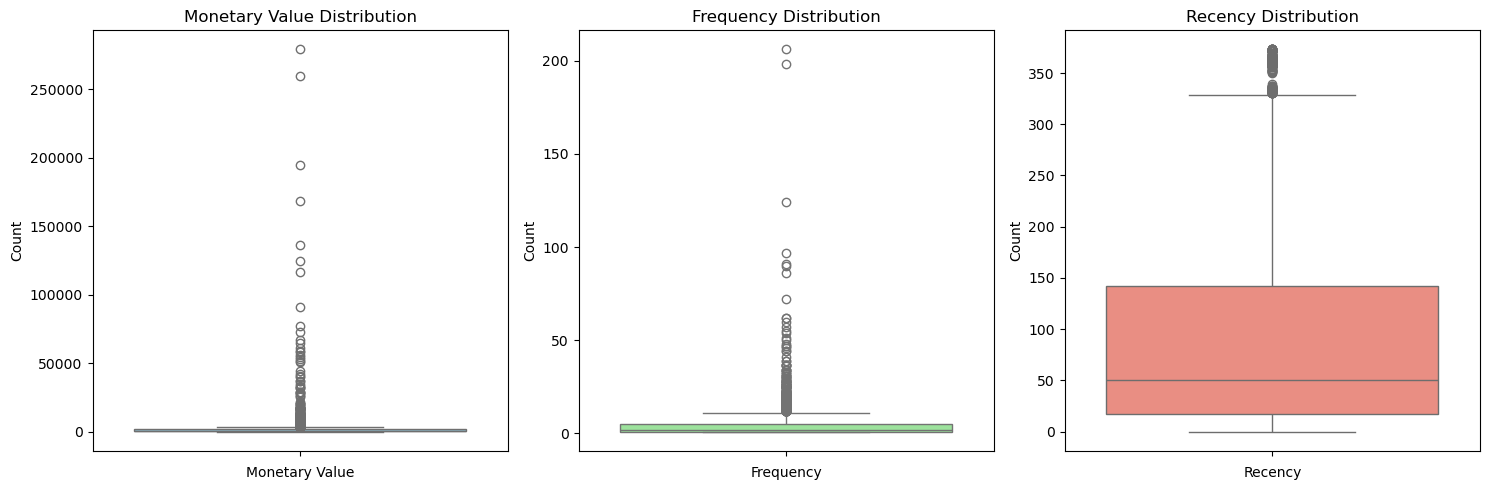

In [32]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)           
sns.boxplot(data=agg_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Distribution')
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1,3,2)           
sns.boxplot(agg_df['Frequency'], color='lightgreen' )
plt.title('Frequency Distribution')
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)           
sns.boxplot(data=agg_df['Recency'], color='salmon')
plt.title('Recency Distribution')
plt.xlabel("Recency")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
 
 

<h3>Treating the outliers

In [34]:
M_Q1 = agg_df['MonetaryValue'].quantile(0.25)
M_Q3 = agg_df['MonetaryValue'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = agg_df[(agg_df['MonetaryValue'] > (M_Q3 + 1.5 * M_IQR)) | (agg_df['MonetaryValue'] < (M_Q1 - 1.5 * M_IQR))].copy() 
monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,425.000000,425.000000,425.000000,425,425.000000
mean,15033.644706,12568.004141,16.647059,2011-11-14 08:29:09.741176576,24.724706
min,12346.000000,3622.680000,1.000000,2010-12-02 15:27:00,0.000000
25%,13324.000000,4359.320000,8.000000,2011-11-15 14:22:00,3.000000
50%,15005.000000,5891.610000,12.000000,2011-11-29 12:09:00,10.000000
75%,16655.000000,9430.520000,19.000000,2011-12-06 12:09:00,23.000000
max,18251.000000,279138.020000,206.000000,2011-12-09 12:49:00,371.000000
std,1797.854931,26097.899415,19.066978,NaN,47.076383


In [35]:
M_Q1 = agg_df['Frequency'].quantile(0.25)
M_Q3 = agg_df['Frequency'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

frequency_outliers_df = agg_df[(agg_df['Frequency'] > (M_Q3 + 1.5 * M_IQR)) | (agg_df['Frequency'] < (M_Q1 - 1.5 * M_IQR))].copy() 
frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,278.000000,278.000000,278.000000,278,278.000000
mean,15355.669065,14488.006691,23.089928,2011-11-25 21:49:19.640287744,13.165468
min,12395.000000,1296.440000,12.000000,2010-12-02 15:27:00,0.000000
25%,13880.250000,4197.772500,13.000000,2011-11-23 20:17:15,2.000000
50%,15290.500000,6283.525000,17.000000,2011-12-03 13:42:00,5.500000
75%,16781.250000,11040.835000,25.000000,2011-12-07 12:15:30,15.000000
max,18283.000000,279138.020000,206.000000,2011-12-09 12:49:00,371.000000
std,1745.001840,30142.778160,21.166586,NaN,30.366616


In [36]:
non_outliers_df = (agg_df[(~agg_df.index.isin(monetary_outliers_df.index)) & (~agg_df.index.isin(frequency_outliers_df.index))]).reset_index(drop= True)

In [37]:

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3863.000000,3863.000000,3863.000000,3863,3863.000000
mean,15323.852705,853.814417,2.755113,2011-08-31 01:42:04.721718784,99.943826
min,12348.000000,3.750000,1.000000,2010-12-01 09:53:00,0.000000
25%,13850.500000,278.500000,1.000000,2011-07-01 15:21:00,21.000000
50%,15333.000000,570.460000,2.000000,2011-10-11 14:24:00,58.000000
75%,16798.000000,1187.005000,4.000000,2011-11-17 13:39:00,160.000000
max,18287.000000,3619.170000,11.000000,2011-12-09 12:50:00,373.000000
std,1709.731704,794.608100,2.168124,NaN,101.866688


In [38]:
non_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12348.0,1437.24,4,2011-09-25 13:13:00,74
1,12349.0,1457.55,1,2011-11-21 09:51:00,18
2,12350.0,294.40,1,2011-02-02 16:01:00,309
3,12352.0,1385.74,7,2011-11-03 14:37:00,35
4,12353.0,89.00,1,2011-05-19 17:47:00,203
...,...,...,...,...,...
3858,18278.0,173.90,1,2011-09-27 11:58:00,73
3859,18280.0,180.60,1,2011-03-07 09:52:00,277
3860,18281.0,80.82,1,2011-06-12 10:53:00,180
3861,18282.0,178.05,2,2011-12-02 11:43:00,7


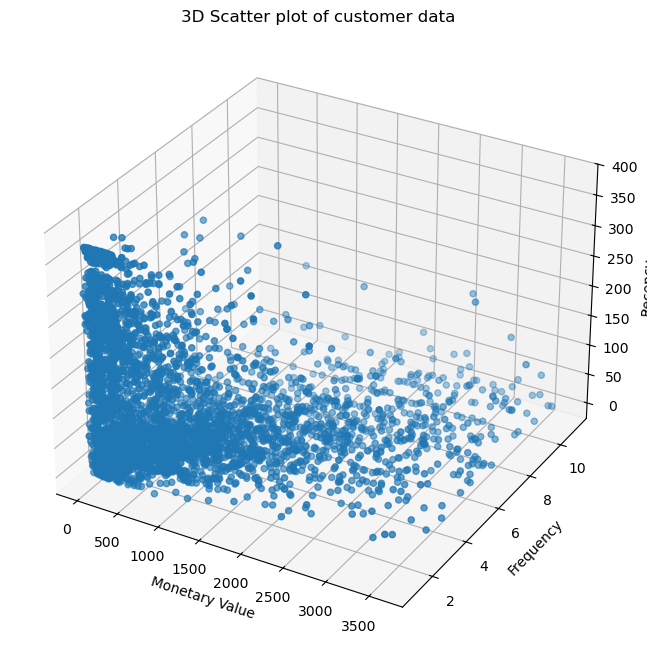

In [39]:
fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection= '3d')
scatter = ax.scatter(non_outliers_df['MonetaryValue'], non_outliers_df['Frequency'], non_outliers_df['Recency'])
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter plot of customer data')
plt.show()

<h2> Training the Model
<h3> Step 1: Feature Scaling

In [41]:
Scaler = StandardScaler()
Scaled_data = Scaler.fit_transform(non_outliers_df[['MonetaryValue', 'Frequency', 'Recency']])
Scaled_data

array([[ 0.73432565,  0.57425162, -0.25471707],
       [ 0.75988873, -0.8096124 , -0.80452635],
       [-0.70410412, -0.8096124 ,  2.05251827],
       ...,
       [-0.97292551, -0.8096124 ,  0.78599334],
       [-0.85054746, -0.34832439, -0.9125246 ],
       [ 1.23783397,  0.11296362, -0.5688938 ]])

In [42]:
Scaled_data = pd.DataFrame(Scaled_data,columns=('MonetaryValue', 'Frequency', 'Recency'))

In [43]:
Scaled_data

,MonetaryValue,Frequency,Recency
0,0.734326,0.574252,-0.254717
1,0.759889,-0.809612,-0.804526
2,-0.704104,-0.809612,2.052518
3,0.669505,1.958116,-0.637620
4,-0.962630,-0.809612,1.011808
...,...,...,...
3858,-0.855771,-0.809612,-0.264535
3859,-0.847338,-0.809612,1.738342
3860,-0.972926,-0.809612,0.785993
3861,-0.850547,-0.348324,-0.912525


<h3> Step 2: KMeans Clusteriing

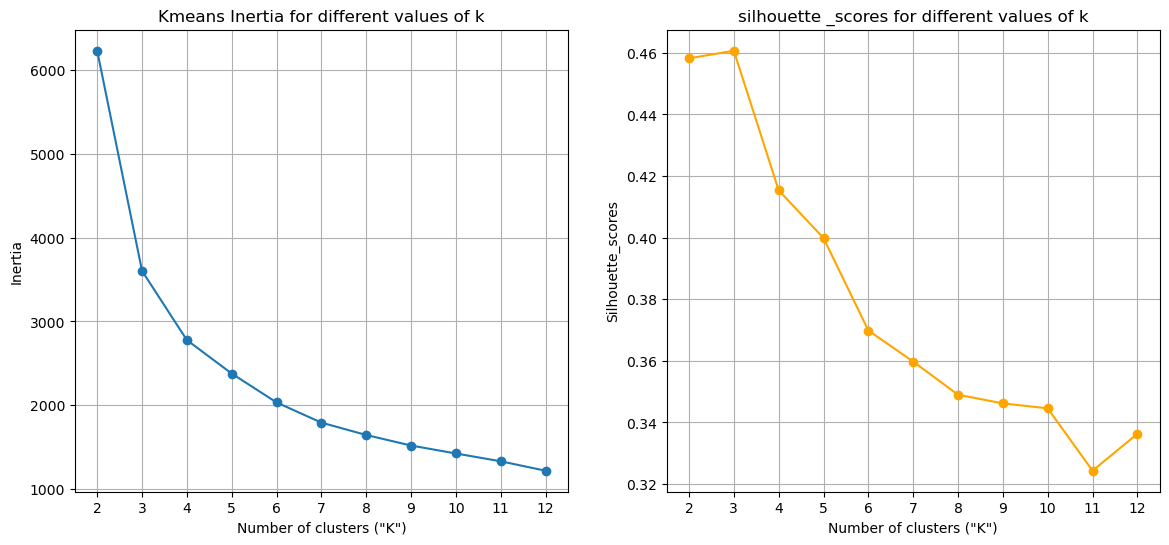

In [46]:
inertia = []
silhoutte_scores = []
for i in range(2,13):
    kmeans = KMeans(n_clusters=i, random_state=42,max_iter=1000 )
    cluster_labels = kmeans.fit_predict(Scaled_data)
    sil_score = silhouette_score(Scaled_data, cluster_labels)
    silhoutte_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(range(2,13), inertia, marker="o")
plt.title('Kmeans Inertia for different values of k')
plt.xlabel('Number of clusters ("K")')
plt.ylabel("Inertia")
plt.xticks(range(2,13))
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(range(2,13), silhoutte_scores, marker="o", color='orange')
plt.title('silhouette _scores for different values of k')
plt.xlabel('Number of clusters ("K")')
plt.ylabel("Silhouette_scores")
plt.xticks(range(2,13))
plt.grid(True)

plt.show()

In [47]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(Scaled_data)
cluster_labels

array([3, 0, 1, ..., 1, 0, 3])

In [48]:
non_outliers_df['Cluster']= cluster_labels
non_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12348.0,1437.24,4,2011-09-25 13:13:00,74,3
1,12349.0,1457.55,1,2011-11-21 09:51:00,18,0
2,12350.0,294.40,1,2011-02-02 16:01:00,309,1
3,12352.0,1385.74,7,2011-11-03 14:37:00,35,2
4,12353.0,89.00,1,2011-05-19 17:47:00,203,1
...,...,...,...,...,...,...
3858,18278.0,173.90,1,2011-09-27 11:58:00,73,0
3859,18280.0,180.60,1,2011-03-07 09:52:00,277,1
3860,18281.0,80.82,1,2011-06-12 10:53:00,180,1
3861,18282.0,178.05,2,2011-12-02 11:43:00,7,0


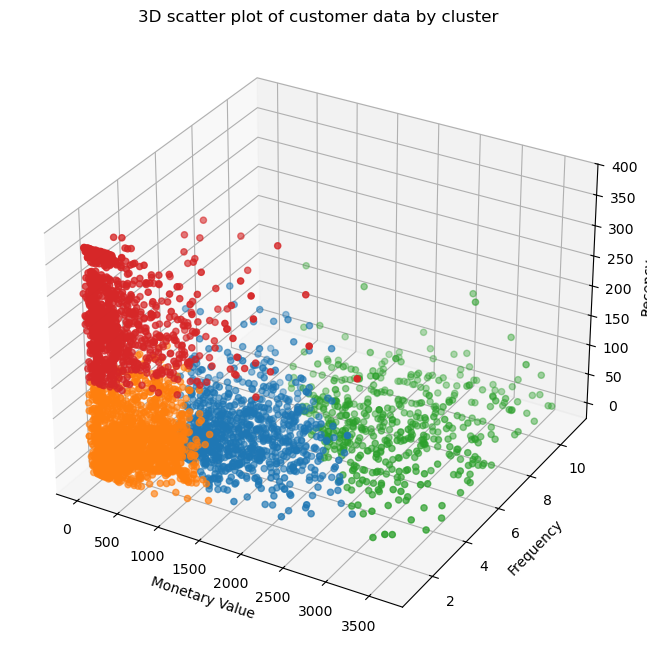

In [49]:
cluster_colors = {0: '#ff7f0e',
                  1: '#d62728',
                  2: '#2ca02c',
                  3: '#1f77b4'}
colors = non_outliers_df['Cluster'].map(cluster_colors)

fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

ax.scatter(non_outliers_df['MonetaryValue'],
           non_outliers_df['Frequency'],
           non_outliers_df['Recency'],
           c=colors, )
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D scatter plot of customer data by cluster')
plt.show()

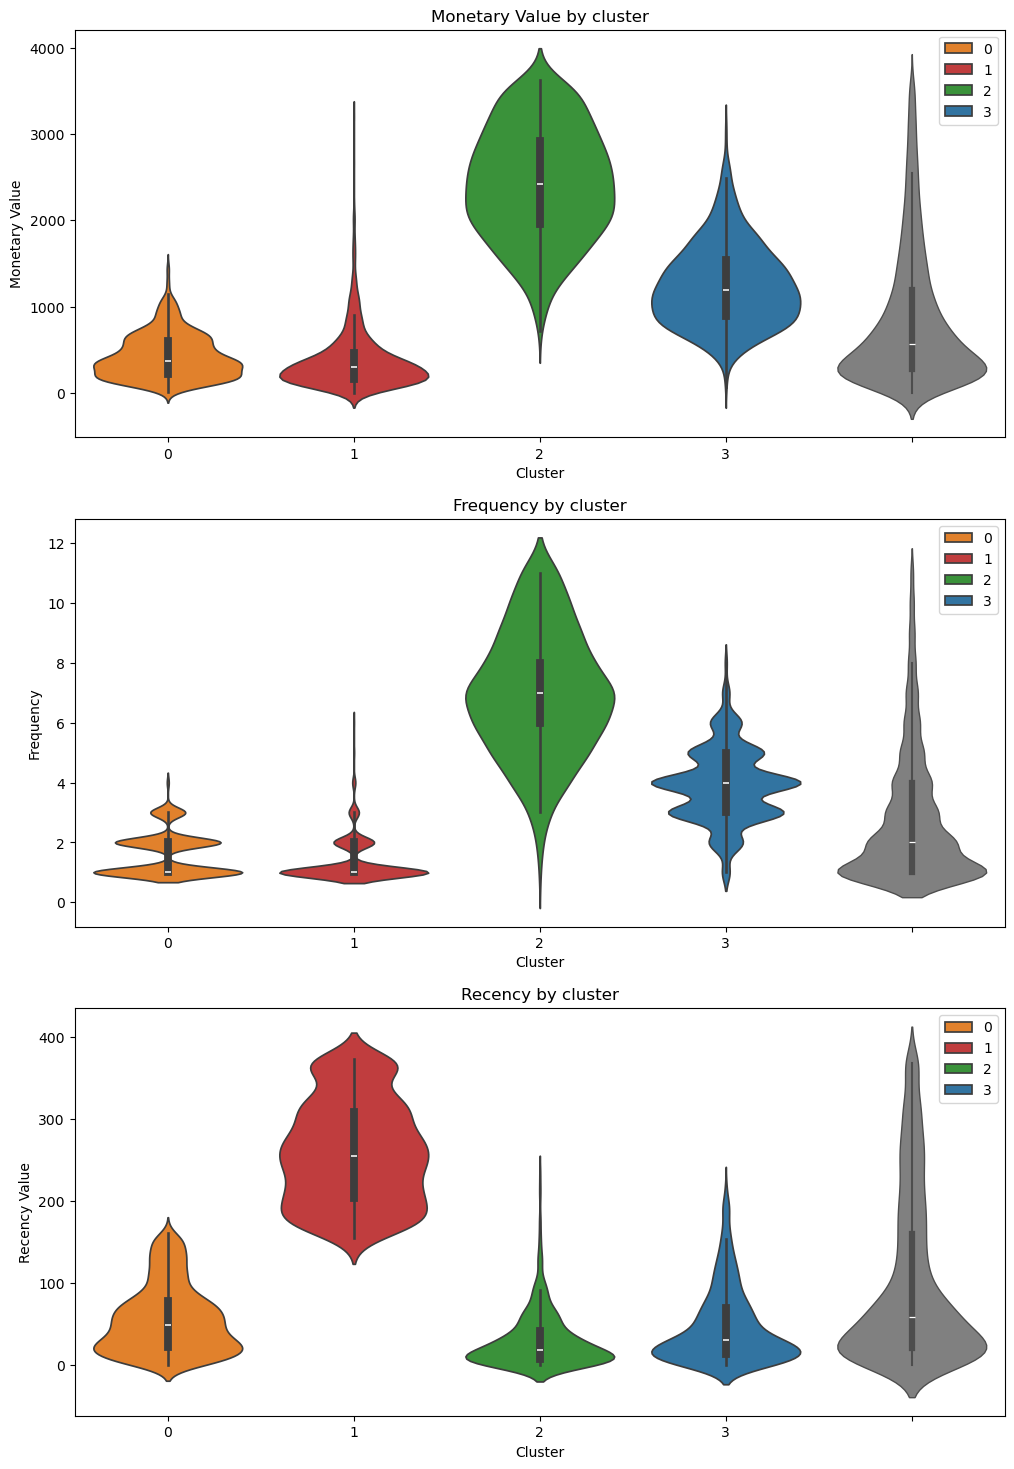

In [50]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='grey',  linewidth=1.0)
plt.title('Monetary Value by cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['Frequency'], color='grey', linewidth=1.0)
plt.title('Frequency by cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['Recency'], color='grey', linewidth=1.0)
plt.title('Recency by cluster')
plt.ylabel('Recency Value')

plt.show()

<h3><b> INSIGHTS</b><br>
<h4><p>1: Cluster 0 (Orange):  'Re-Engage'</p><br>

<p>•	Rationale: This group Includes lower value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behaviour.
<p>•	Action: Use targeted marketing campaigns, special discounts, or reminder to encourage them to return and purchase again</p><br>
<p>2: Cluster 1 (Red): ‘Reward’</p><br>
<p>•	Rationale: This includes high value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and regarding their loyalty is key to maintaining their engagement.</p>
<p>•	Action: Implement a robust loyalty program, provide exclusive offers, and recognise their loyalty to keep them engaged and satisfied</p><br>
<p>3: Cluster 2 (Green): ‘Nurture’</p><br>
<p>•	Rationale: This cluster represents the least active and lowest value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.</p>
<p>•	Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.
<p><br>4: Cluster 3 (Blue): ‘Retain’</p><br>
<p>•	Rationale: This cluster represents high value customers who purchases regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.</p>
<p>•	Action: Implement loyalty programs, personalised offer, and regular engagement to ensure the remain active</p><br>
<p><b>Summary of cluster Names:<b></p><br>
<p>• Cluster 0 (Orange):  'Re-Engage'</p>
<p>• Cluster 1 (Red): ‘Reward’</p>
<p>• Cluster 2 (Green): ‘Nurture’</p>
<p>• Cluster 3 (Blue): ‘Retain’</p>




<h3><b> Dealing with the Outliers

In [61]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers=monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers=frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers=monetary_outliers_df.loc[overlap_indices]

In [63]:
monetary_only_outliers['Cluster']= -1
frequency_only_outliers['Cluster']= -2
monetary_and_frequency_outliers['Cluster']=-3

outliers_clusters_df=pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outliers_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,77183.60,1,2011-01-18 10:01:00,325,-1
1,12347.0,4310.00,7,2011-12-07 15:52:00,1,-1
10,12357.0,6207.67,1,2011-11-06 16:07:00,32,-1
12,12359.0,6372.58,4,2011-10-13 12:47:00,57,-1
15,12362.0,4737.23,10,2011-12-06 15:40:00,2,-1
...,...,...,...,...,...,...
4248,18172.0,7561.68,20,2011-11-25 11:12:00,14,-3
4268,18198.0,5425.56,17,2011-12-05 14:49:00,3,-3
4287,18223.0,6484.54,14,2011-12-05 09:11:00,4,-3
4289,18225.0,5509.12,12,2011-12-06 13:27:00,2,-3


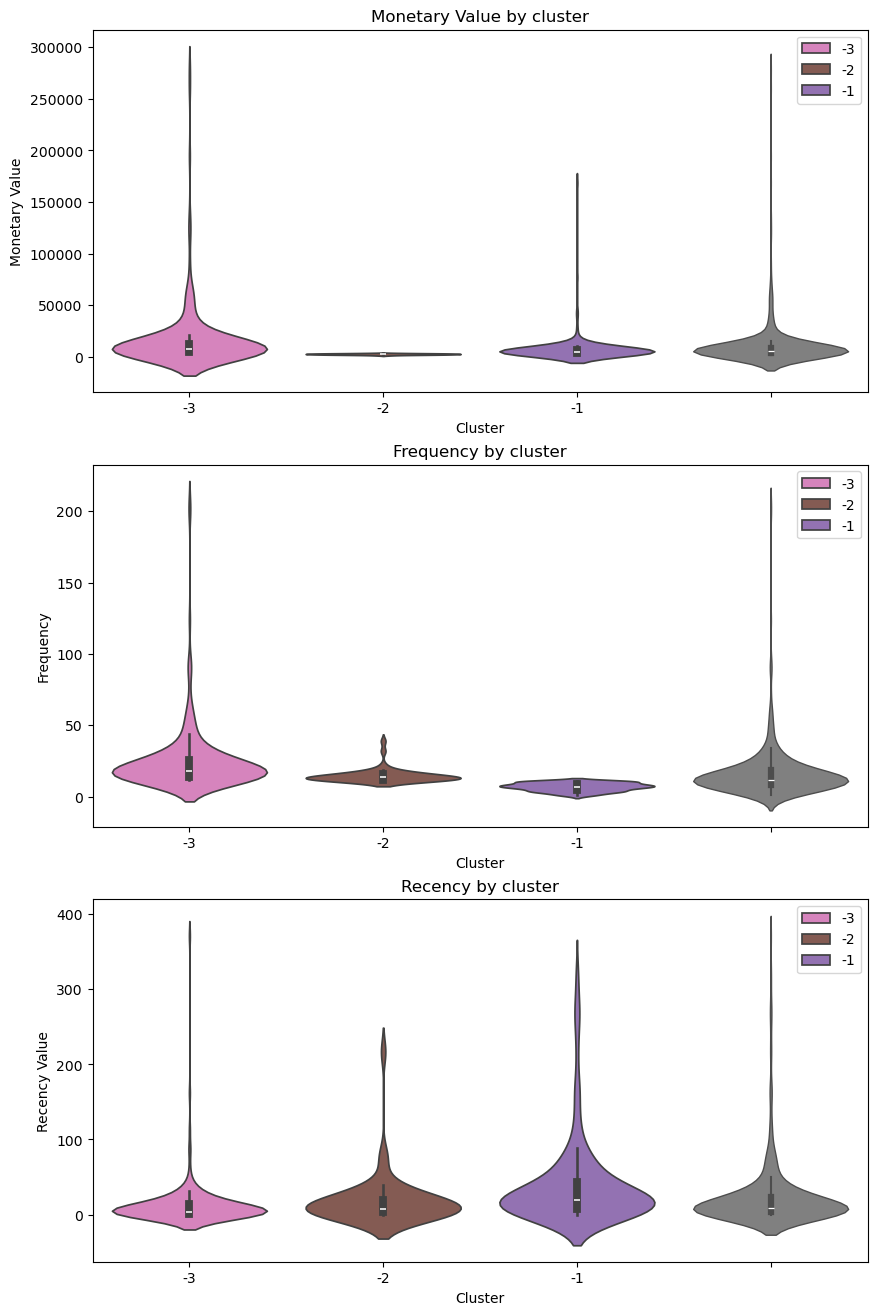

In [65]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(10,16))

plt.subplot(3,1,1)
sns.violinplot(x=outliers_clusters_df['Cluster'], y=outliers_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outliers_clusters_df['Cluster'])
sns.violinplot(y=outliers_clusters_df['MonetaryValue'], color='grey',  linewidth=1.0)
plt.title('Monetary Value by cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x=outliers_clusters_df['Cluster'], y=outliers_clusters_df['Frequency'], palette=cluster_colors, hue=outliers_clusters_df['Cluster'])
sns.violinplot(y=outliers_clusters_df['Frequency'], color='grey', linewidth=1.0)
plt.title('Frequency by cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=outliers_clusters_df['Cluster'], y=outliers_clusters_df['Recency'], palette=cluster_colors, hue=outliers_clusters_df['Cluster'])
sns.violinplot(y=outliers_clusters_df['Recency'], color='grey', linewidth=1.0)
plt.title('Recency by cluster')
plt.ylabel('Recency Value')

plt.show()

<h4><p>Cluster -1 (Monetary Outliers) PAMPER: Characteristics: High Spenders but not necessarily frequent buyers. Potential Strategy: Focus on mantaining their loyalty with personalised offers or luxury services that cater their high spending capacity.</p><br>

<p>Cluster -2 (Frequent Outliers) UPSELL: Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities. Potential Strategy: Implement Loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement</p><br>

<p>Cluster -3 (Monetary and Frequency Outliers) DELIGHT: Characteristics: The most valuable customers, with spending and frequent purchases. They are likely your top-tier customers who require special attention. Potential Strategy: Develop Vip programs or exclusive offers to maintain their loyalty and encourage continued engagement</p>

In [67]:
Full_clustering_df = pd.concat([non_outliers_df, outliers_clusters_df])
Full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12348.0,1437.24,4,2011-09-25 13:13:00,74,3
1,12349.0,1457.55,1,2011-11-21 09:51:00,18,0
2,12350.0,294.40,1,2011-02-02 16:01:00,309,1
3,12352.0,1385.74,7,2011-11-03 14:37:00,35,2
4,12353.0,89.00,1,2011-05-19 17:47:00,203,1
...,...,...,...,...,...,...
4248,18172.0,7561.68,20,2011-11-25 11:12:00,14,-3
4268,18198.0,5425.56,17,2011-12-05 14:49:00,3,-3
4287,18223.0,6484.54,14,2011-12-05 09:11:00,4,-3
4289,18225.0,5509.12,12,2011-12-06 13:27:00,2,-3


In [69]:
ClusterLabel = {0:'Re-Engage',
                 1: "Reward",
                 2: "Nurture",
                 3: "Retain",
                 -1: "Pamper",
                 -2:"Upsell",
                 -3: "Delight"}


In [71]:
Full_clustering_df['Cluster Label'] = Full_clustering_df['Cluster'].map(ClusterLabel)

In [73]:
Full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,Cluster Label
0,12348.0,1437.24,4,2011-09-25 13:13:00,74,3,Retain
1,12349.0,1457.55,1,2011-11-21 09:51:00,18,0,Re-Engage
2,12350.0,294.40,1,2011-02-02 16:01:00,309,1,Reward
3,12352.0,1385.74,7,2011-11-03 14:37:00,35,2,Nurture
4,12353.0,89.00,1,2011-05-19 17:47:00,203,1,Reward
...,...,...,...,...,...,...,...
4248,18172.0,7561.68,20,2011-11-25 11:12:00,14,-3,Delight
4268,18198.0,5425.56,17,2011-12-05 14:49:00,3,-3,Delight
4287,18223.0,6484.54,14,2011-12-05 09:11:00,4,-3,Delight
4289,18225.0,5509.12,12,2011-12-06 13:27:00,2,-3,Delight


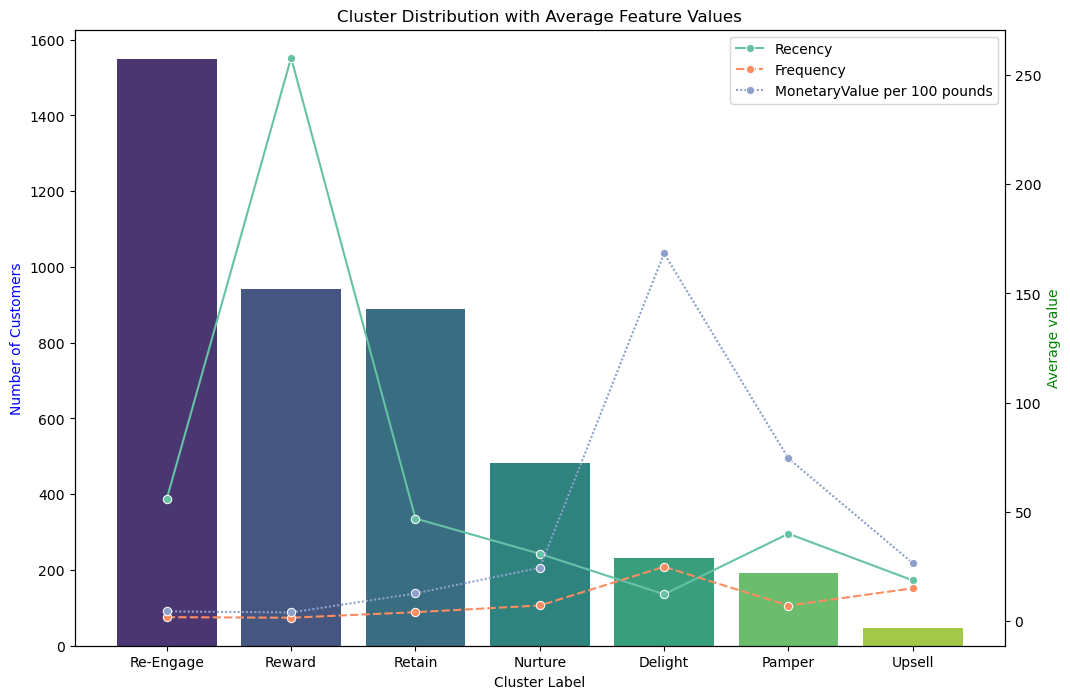

In [75]:
cluster_counts = Full_clustering_df['Cluster Label'].value_counts()
Full_clustering_df['MonetaryValue per 100 pounds']= Full_clustering_df['MonetaryValue']/100
feature_means = Full_clustering_df.groupby('Cluster Label')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12,8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average value', color = 'g')
plt.grid(False)
plt.show()

In [79]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.
